In [1]:
from normal_product_for_git import *

10.868321597879405
-2.950004016371126


c:\Users\aheki\Downloads\boundary_hypergeo\normal_product_for_git.py:425: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  fn=lambda c,z,lx,ly,r:np.exp(sign*z*r/((1-r**2)*s1*s2)-c*abs(z)/2.0-c*(lx*(1-r)+ly*(1+r))/2.0)*quad(lambda t:np.exp(-c*abs(z)*t-c*np.sqrt(abs(z)*t)*(np.sqrt(ly)*(1+r)+np.sqrt(lx)*(1-r)*(np.sqrt(1.0+1.0/t))))*(t*(1+t))**-0.5,a=0.0,b=np.inf)[0]/(np.sqrt(1.0-r**2)*np.pi*s1*s2)
C:\Users\aheki\AppData\Local\Temp\ipykernel_14888\1599733559.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rvsvcorr,kde=False,hist=True,norm_hist=True,color='orange')


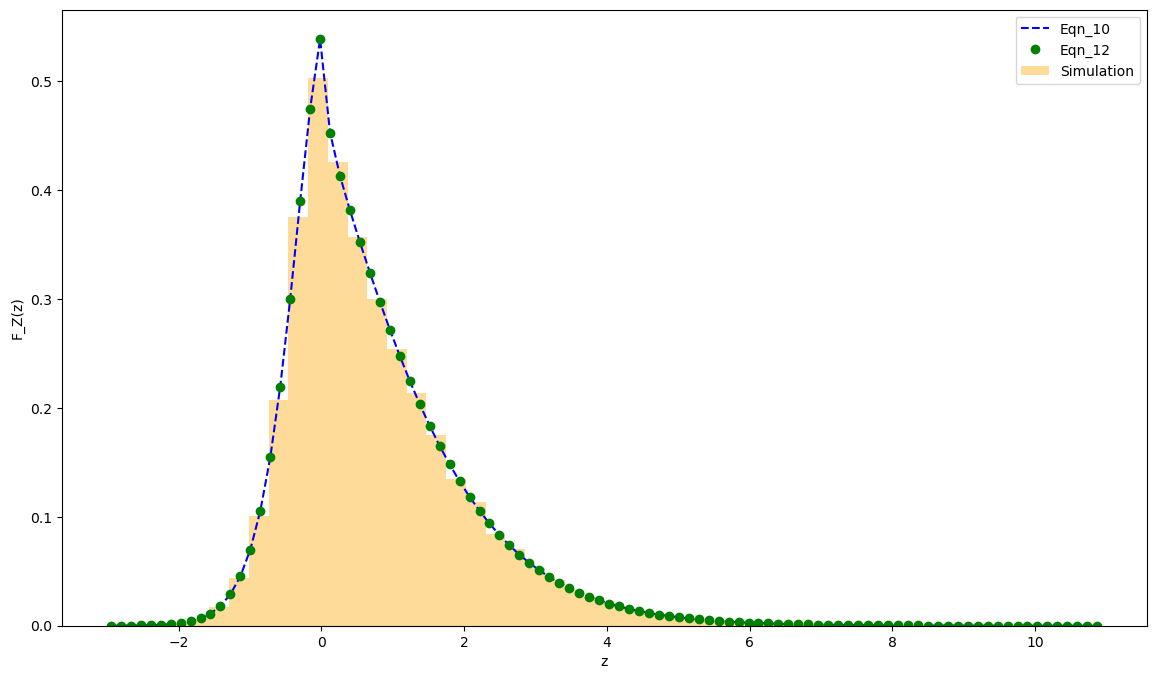

In [2]:
#%%
mm1,mm2,ss1,ss2,rr=1.0,0.5,2.0,0.2,0.6
bivr=mvn.rvs([mm1,mm2],cov=[[ss1**2,rr*ss1*ss2],[rr*ss1*ss2,ss2**2]],size=100000)
rvsvcorr=bivr[:,0]*bivr[:,1]
xmincorr=rvsvcorr.min()
xmaxcorr=rvsvcorr.max()
zzcorr=np.linspace(xmincorr,xmaxcorr,100)
ecdfcor=ECDF(rvsvcorr)
cdfsimcorr=ecdfcor(zzcorr)
print(rvsvcorr.max())
print(rvsvcorr.min())
zzcorr=np.linspace(xmincorr,xmaxcorr,100)
fchcorr=Pnormprodpdfbynchi2(zzcorr,[mm1,mm2,ss1,ss2,rr],True,False)
semiApdf=[getfnFsxsyN(xz,ss1,ss2,mm1,mm2,rr)[0] for xz in zzcorr]
#%%
plt.figure(figsize=(14, 8))
sns.distplot(rvsvcorr,kde=False,hist=True,norm_hist=True,color='orange')
#sns.histplot(rvsvcorr,kde=False,stat='density')
plt.plot(zzcorr,fchcorr,'--',color='blue')
plt.plot(zzcorr,semiApdf,'o',color='green')
plt.legend(['Eqn_10','Eqn_12','Simulation'])
# plt.grid(True)
plt.xlabel("z")
plt.ylabel("F_Z(z)")
plt.show()